<a href="https://colab.research.google.com/github/gustavo1902/Recomendacao-de-filmes/blob/main/Recomenda%C3%A7%C3%A3o_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../content/drive/MyDrive/Colab Notebooks/ia/tmdb_5000_credits.csv/tmdb_5000_credits.csv')
df2=pd.read_csv('../content/drive/MyDrive/Colab Notebooks/ia/tmdb_5000_movies.csv/tmdb_5000_movies.csv')

O primeiro conjunto de dados contém os seguintes recursos: 

movie_id - Um identificador exclusivo para cada filme.
elenco - O nome dos atores principais e coadjuvantes.
crew - O nome do Diretor, Editor, Compositor, Escritor etc.

O segundo conjunto de dados tem os seguintes recursos: -

budget - O orçamento em que o filme foi feito.
gênero - O gênero do filme, Ação, Comédia, Suspense etc.
homepage - Um link para a página inicial do filme.
id - Este é de fato o movie_id como no primeiro conjunto de dados.
palavras-chave - As palavras-chave ou tags relacionadas ao filme.
original_language - O idioma no qual o filme foi feito.
original_title - O título do filme antes da tradução ou adaptação.
visão geral - Uma breve descrição do filme.
popularidade - Uma quantidade numérica que especifica a popularidade do filme.
production_companies - A casa de produção do filme.
production_countries - O país em que foi produzido.
release_date - A data em que foi lançado.
receita - A receita mundial gerada pelo filme.
runtime - O tempo de execução do filme em minutos.
status - "Lançado" ou "Rumor".
slogan - slogan do filme.
title - Título do filme.
vote_average - classificações médias que o filme recebeu.
vote_count - a contagem de votos recebidos.

Vamos juntar os dois conjuntos de dados na coluna 'id'

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

Vemos que existem 481 filmes que se qualificam para estar nesta lista. Agora, precisamos calcular nossa métrica para cada filme qualificado. Para fazer isso, definiremos uma função, **weighted_rating()** e definiremos uma nova pontuação, da qual calcularemos o valor aplicando esta função ao nosso DataFrame de filmes qualificados:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
## Define um novo recurso 'score' e calcule seu valor com `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#classificar com base na pontuação
q_movies = q_movies.sort_values('score', ascending=False)

#top 10 filmes
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

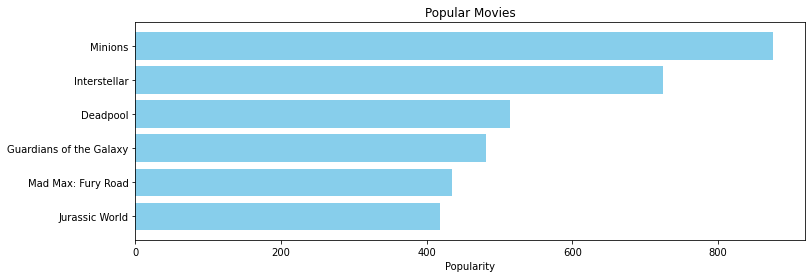

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define um Objeto Vetorizador TF-IDF. Remova todas as palavras de parada em inglês, como 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Substitui NaN por uma string vazia
df2['overview'] = df2['overview'].fillna('')

#Construindo a matriz TF-IDF necessária ajustando e transformando os dados
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Exibe a forma da matrix
tfidf_matrix.shape

(4803, 20978)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Calcula a matriz de similaridade do cosseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Vamos definir uma função que recebe um título de filme como entrada e gera uma lista dos 10 filmes mais semelhantes. Primeiramente, para isso, precisamos de um mapeamento reverso de títulos de filmes e índices DataFrame. Em outras palavras, precisamos de um mecanismo para identificar o índice de um filme em nosso DataFrame de metadados, dado seu título.

In [ ]:
#Construir um mapa reverso de índices e títulos de filmes
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:
# Função que recebe o título do filme como entrada e produz a maioria dos filmes semelhantes
def get_recommendations(title, cosine_sim=cosine_sim):
    # Obtém o índice do filme que corresponde ao título
    idx = indices[title]

   # Obter as pontuações de semelhança de pares de todos os filmes com esse filme
    sim_scores = list(enumerate(cosine_sim[idx]))

  # Classifique os filmes com base nas pontuações de semelhança
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenha as pontuações dos 10 filmes mais semelhantes
    sim_scores = sim_scores[1:11]

    # Obtenha os índices do filme
    movie_indices = [i[0] for i in sim_scores]

    # Retorne os 10 filmes mais parecidos
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [ ]:
# Analisa os recursos de string em seus objetos python correspondentes
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
# Obtenha o nome do diretor no recurso de equipe. Se o diretor não estiver listado, retorne NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Retorna os 3 primeiros elementos da lista ou a lista inteira; o que for mais.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Verifique se existem mais de 3 elementos. Se sim, retorne apenas os três primeiros. Se não, retorna a lista inteira.
        if len(names) > 3:
            names = names[:3]
        return names

    #Retorna a lista vazia em caso de dados ausentes/malformados
    return []

In [ ]:
# Definir novos recursos de diretor, elenco, gêneros e palavras-chave que estejam de forma adequada.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Imprima os novos recursos dos 3 primeiros filmes
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# Função para converter todas as strings para minúsculas e retirar nomes de espaços
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Verifica se o diretor existe. Se não, retorna uma string vazia
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Aplique a função clean_data aos seus recursos.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Criando a "sopa de metadados", que é uma string que contém todos os metadados que queremos alimentar ao nosso vetorizador (nomeadamente atores, realizador e palavras-chave).

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# Calcula a matriz de similaridade de cossenos com base na count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Redefine o índice do nosso DataFrame principal e construa o mapeamento reverso como antes
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [ ]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [ ]:
import surprise
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
#from surprise import evaluate #sabe de uma semelhante???
reader = Reader()
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ia/movie_rat.csv/ratings_small.csv') 
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


daqui pra baixo precisa arrumar

In [ ]:
#data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#data.split(n_folds=5)
#cross_validate(ratings, data, measures=['RMSE'], cv=5)


data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7f0a7e348e50>

In [ ]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])'''

SyntaxError: ignored

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

SyntaxError: ignored

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302, 3)

NameError: ignored